In [61]:
import pandas as pd

data = pd.read_csv('covid_final.csv')

display(data.head())



,date,location_key,inc_case,inc_hosp,inc_death,sni_covid19_vaccination,liberalism,children,adult,elderly,new_persons_vaccinated,stringency_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2021-01,Alabama,112124,1.372356,1.585399,0.031997,-0.816497,-0.23121,-0.236644,-0.198309,-0.111326,0.498760,-1.143758,-1.227587,-1.007846,-0.703170,-0.398907,1.143486
1,2021-02,Alabama,37101,0.126669,1.195824,0.472835,-0.816497,-0.23121,-0.236644,-0.198309,0.112097,0.634711,-1.028458,-0.888986,-1.000682,-0.661838,0.009115,0.927061
2,2021-03,Alabama,21389,-0.262078,-0.136416,0.761165,-0.816497,-0.23121,-0.236644,-0.198309,0.389475,0.554740,0.241540,-0.181258,-0.537001,0.200799,0.402581,-0.315151
3,2021-04,Alabama,11826,-0.304693,-0.340623,0.150885,-0.816497,-0.23121,-0.236644,-0.198309,0.261525,-0.108781,0.608726,0.282600,-0.243542,0.597655,0.507273,-0.860569
4,2021-05,Alabama,17507,-0.310478,-0.363229,-0.621516,-0.816497,-0.23121,-0.236644,-0.198309,-0.203040,-0.438971,0.495242,0.794291,-0.130346,0.702666,0.407784,-0.822269


In [52]:
data['liberalism_dummy'] = data['liberalism']

In [53]:
data['interaction'] = data['liberalism_dummy'] * data['stringency_index']



In [55]:
conservative_data = data[data['liberalism_dummy'] < 0]
liberal_data = data[data['liberalism_dummy'] > 0]


In [56]:
# Check unique values of the interaction term in conservative_data
unique_interaction_values = conservative_data['interaction'].unique()
unique_interaction_values


array([-4.07236208e-01, -5.18239380e-01, -4.52943396e-01,  8.88191011e-02,
        3.58417918e-01,  6.27822569e-01,  8.49828913e-01,  9.96737047e-01,
        7.63253016e-01,  6.08066228e-01,  7.46250141e-04, -8.05189391e-01,
       -9.90061580e-01, -1.89598588e-01,  5.60835467e-01, -1.56182422e+00,
       -1.59658611e+00, -9.19152021e-01,  3.41476977e-01,  6.95537792e-01,
        7.47539702e-01,  1.03265767e+00,  8.77470879e-01,  8.30240118e-01,
        8.30240118e-01,  7.25954447e-01, -1.44231847e+00, -1.30783425e+00,
       -3.82808933e-01, -1.22384437e-01, -1.13404282e-01, -8.72858887e-02,
        3.67108391e-01,  7.49467264e-01,  8.97955341e-01,  7.42768554e-01,
        6.17323539e-01,  5.27159885e-01,  5.95597357e-01, -5.88867086e-01,
       -4.84017708e-01, -6.66658559e-01, -4.91007666e-01,  7.71520708e-01,
        7.91062528e-01,  9.38196144e-01,  7.38278476e-01,  5.82561648e-01,
        3.53425090e-01,  1.56000369e-01,  5.06857454e-01,  6.39049720e-01,
       -1.05704868e+00, -

In [57]:
import statsmodels.api as sm

X_conservative = conservative_data.drop(columns=['inc_case', 'date', 'location_key', 'liberalism_dummy'])
X_conservative = sm.add_constant(X_conservative)
y_conservative = conservative_data['inc_case']

X_liberal = liberal_data.drop(columns=['inc_case', 'date', 'location_key', 'liberalism_dummy'])
X_liberal = sm.add_constant(X_liberal)
y_liberal = liberal_data['inc_case']


In [58]:
model_conservative = sm.OLS(y_conservative, X_conservative).fit()
model_liberal = sm.OLS(y_liberal, X_liberal).fit()

print(model_conservative.summary())
print(model_liberal.summary())


                            OLS Regression Results                            
Dep. Variable:               inc_case   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     95.35
Date:                Fri, 17 May 2024   Prob (F-statistic):          1.53e-130
Time:                        12:17:51   Log-Likelihood:                -6457.1
No. Observations:                 510   AIC:                         1.294e+04
Df Residuals:                     495   BIC:                         1.301e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [62]:
data['interaction'] = data['liberalism'] * data['stringency_index']



In [63]:
X = data.drop(columns=['inc_case', 'date', 'location_key', 'liberalism'])
X = sm.add_constant(X)
y = data['inc_case']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               inc_case   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     127.4
Date:                Fri, 17 May 2024   Prob (F-statistic):          1.00e-203
Time:                        12:24:11   Log-Likelihood:                -10975.
No. Observations:                 850   AIC:                         2.198e+04
Df Residuals:                     834   BIC:                         2.206e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [64]:

# calculate the error metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')



Mean Squared Error: 9614545905.019356
R^2: 0.6962050364932456


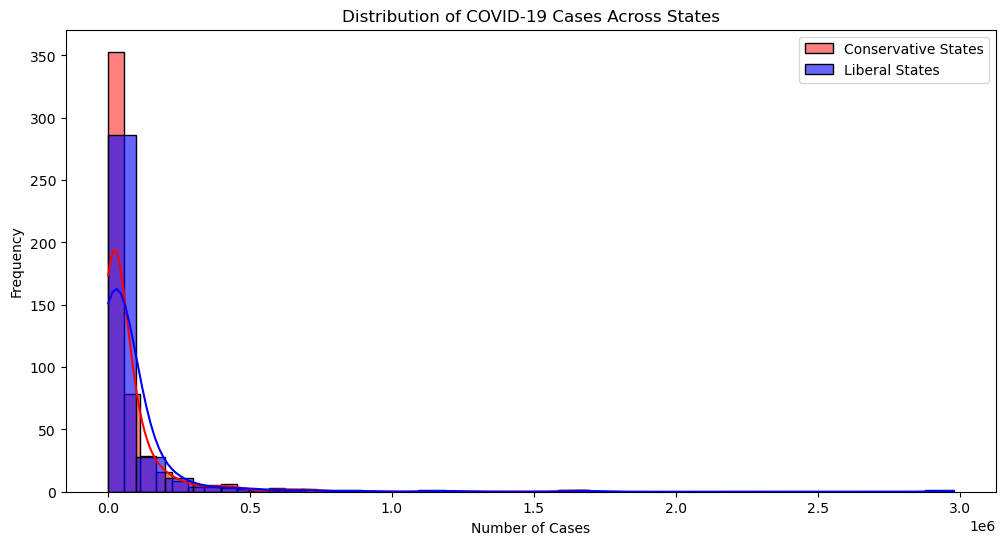

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(conservative_data['inc_case'], color='red', label='Conservative States', kde=True, bins=30)

sns.histplot(liberal_data['inc_case'], color='blue', label='Liberal States', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of COVID-19 Cases Across States')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()


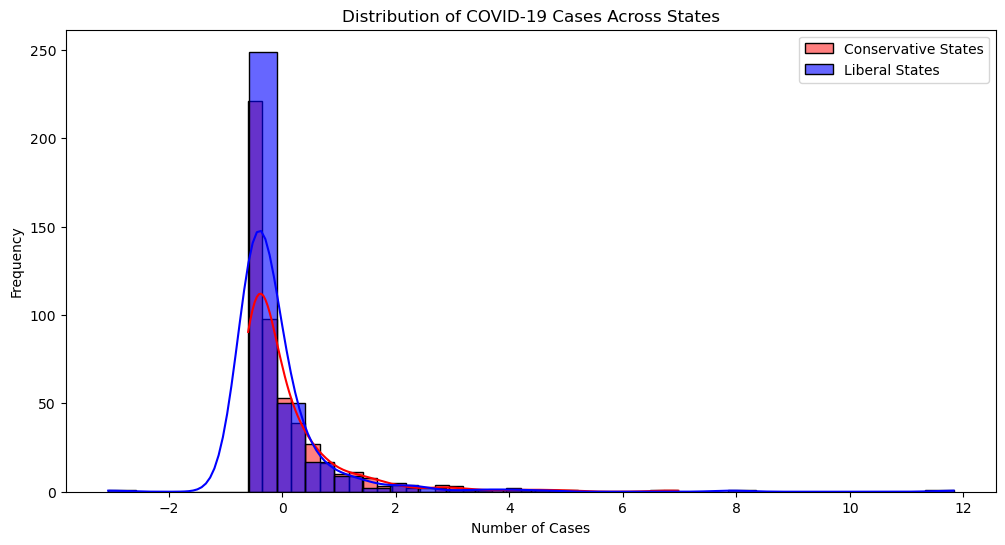

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(conservative_data['inc_death'], color='red', label='Conservative States', kde=True, bins=30)

sns.histplot(liberal_data['inc_death'], color='blue', label='Liberal States', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of COVID-19 Cases Across States')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

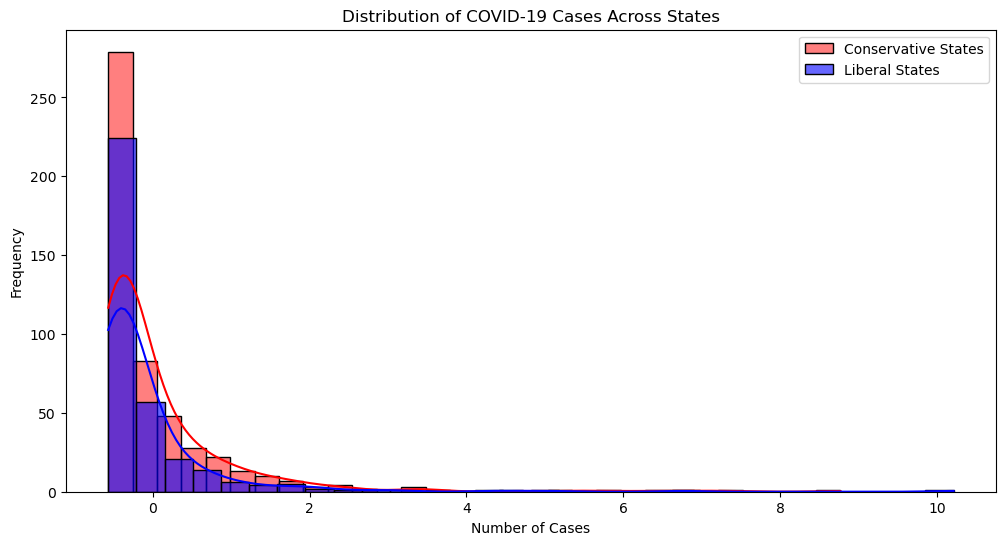

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(conservative_data['inc_hosp'], color='red', label='Conservative States', kde=True, bins=30)

sns.histplot(liberal_data['inc_hosp'], color='blue', label='Liberal States', kde=True, bins=30, alpha=0.6)

plt.title('Distribution of COVID-19 Cases Across States')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()